In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [3]:
df = pd.read_csv("SIC7002-master/kddcup.data_10_percent.gz",compression='gzip',header=None, names = col_names)

df.shape


(494021, 42)

In [4]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


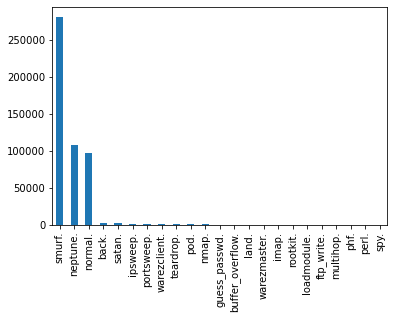

In [5]:
count_Class=pd.value_counts(df["label"], sort= True)
count_Class.plot(kind= 'bar')

In [6]:
# Remove smurf and neptune attacks
df = df[df.label != 'smurf.']
df = df[df.label != 'neptune.']
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [7]:
# One hot encoding
cols_to_dummify = ['protocol_type','service','flag','label']
data_dummy = pd.get_dummies(df, columns=cols_to_dummify, prefix=cols_to_dummify)
data_dummy2 = data_dummy
data_dummy2.head()
dataset_dummy = pd.concat([data_dummy2.iloc[:,:109],data_dummy2['label_normal.']], axis=1)
dataset_dummy.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label_normal.
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [8]:
No_of_frauds= len(dataset_dummy[dataset_dummy["label_normal."]==0])
No_of_normals = len(dataset_dummy[dataset_dummy["label_normal."]==1])      
print("The number of fraudulent transactions( Class 0) are: ", No_of_frauds)
print("The number of normal transactions( Class 1) are: ", No_of_normals)
total= No_of_frauds + No_of_normals
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100
print("Class 1 percentage = ", Normal_percent)
print("Class 0 percentage = ", Fraud_percent)


The number of fraudulent transactions( Class 0) are:  8752
The number of normal transactions( Class 1) are:  97278
Class 1 percentage =  91.7457323399038
Class 0 percentage =  8.2542676600962




    La classe 0 est sous-représentée et ne représente que 8.25 % de l'ensemble des données. Si nous entraînons notre modèle en utilisant cet ensemble de données, le modèle sera inefficace et il sera entraîné à ne prédire que la classe 1 car il ne disposera pas de données d'entraînement suffisantes.
    L'un des autres problèmes liés à l'utilisation de cet ensemble de données biaisées pour entraîner notre modèle est que, comme la classe 0 est sous-représentée, le modèle supposera qu'il s'agit d'un cas rare et tentera de prédire un résultat positif en raison du manque de données d'entraînement.
    Nous pouvons obtenir une grande précision lorsque nous testons notre modèle, mais nous ne devons pas nous tromper car notre ensemble de données ne dispose pas de données de test équilibrées. Nous devons donc nous fier au rappel qui repose sur le TP et le FP.
    Dans les cas où les données sont faussées, il est possible d'ajouter des données supplémentaires sur la caractéristique sous-représentée (sur-échantillonnage). Comme nous n'avons pas cette possibilité, nous devons recourir au sous-échantillonnage.
    Le sous-échantillonnage de l'ensemble de données consiste à conserver toutes nos données sous-représentées (classe 0) tout en ajoutant le même nombre de caractéristiques de la classe 1 pour créer un nouvel ensemble de données comprenant une représentation égale des deux classes.



In [9]:
#list of fraud indices
fraud_index= np.array(dataset_dummy[dataset_dummy["label_normal."]==0].index)

#getting the list of normal indices from the full dataset
normal_index= dataset_dummy[dataset_dummy["label_normal."]==1].index

fraud_index

array([   744,    745,   4049, ..., 490962, 490963, 490964])

In [10]:
#choosing random normal indices equal to the number of fraudulent transactions
random_normal_indices= np.random.choice(normal_index, No_of_frauds, replace= False)
random_normal_indices



array([145979,  25210,  37669, ...,  30139, 138906, 481495])

In [11]:
# concatenate fraud index and normal index to create a list of indices
undersampled_indices= np.concatenate([fraud_index, random_normal_indices])

undersampled_indices

array([   744,    745,   4049, ...,  30139, 138906, 481495])

In [12]:
#use the undersampled indices to build the undersampled_data dataframe
undersampled_data= dataset_dummy.loc[undersampled_indices, :]

print(undersampled_data.head())

       duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
744         184       1511       2957     0               0       0    3   
745         305       1735       2766     0               0       0    3   
4049         79        281       1301     0               0       0    2   
4113         25        269       2333     0               0       0    0   
15699        23        104        276     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  ...  flag_RSTO  \
744                    0          1                2  ...          0   
745                    0          1                2  ...          0   
4049                   0          1                1  ...          0   
4113                   0          1                0  ...          0   
15699                  5          0                0  ...          0   

       flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
744              0          0   

The number of fraudulent transactions( Class 0) are:  8752
The number of normal transactions( Class 1) are:  8752
The total number of rows of both classes are:  17504
Class 1 percentage =  50.0
Class 0 percentage =  50.0


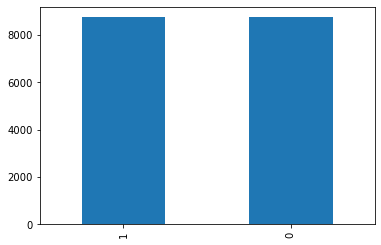

In [13]:
# Exploration du sous-echantillon

No_of_frauds_sampled= len(undersampled_data[undersampled_data["label_normal."]== 0])

No_of_normals_sampled = len(undersampled_data[undersampled_data["label_normal."]== 1])

print("The number of fraudulent transactions( Class 0) are: ", No_of_frauds_sampled)
print("The number of normal transactions( Class 1) are: ", No_of_normals_sampled)
total_sampled= No_of_frauds_sampled + No_of_normals_sampled
print("The total number of rows of both classes are: ", total_sampled)

Fraud_percent_sampled= (No_of_frauds_sampled / total_sampled)*100
Normal_percent_sampled= (No_of_normals_sampled / total_sampled)*100
print("Class 1 percentage = ", Normal_percent_sampled)
print("Class 0 percentage = ", Fraud_percent_sampled)

#Check the data count 
count_sampled=pd.value_counts(undersampled_data["label_normal."], sort= True)
count_sampled.plot(kind= 'bar')



In [25]:
undersampled_data[columns_name[0]].mean()

-5.34007665681753e-15

In [29]:
columns_name= list(undersampled_data)
columns_name

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u'

In [33]:

for k in range(0,len(columns_name)):
    print(undersampled_data[columns_name[k]].mean())

-5.34007665681753e-15
7.611338092460279e-16
-4.443982173796613e-15
0.0011997257769652651
0.18155850091407677
0.00022851919561243144
0.751542504570384
0.0033135283363802557
0.5489602376599635
0.13019881170018283
0.0018281535648994515
5.712979890310786e-05
0.02410877513711152
0.0062842778793418645
0.0008569469835466179
0.0030278793418647165
0.0
0.0
0.019824040219378426
48.293590036563074
10.612888482632542
0.023699725776965185
0.020295932358318076
0.17003656307129783
0.17637625685557562
0.8907809643510048
0.10633626599634312
0.13960123400365654
159.16424817184642
146.3359232175503
0.6986791590493592
0.18043418647168422
0.2730101691042354
0.06651279707494853
0.022301759597805483
0.01952296617915855
0.17976291133455394
0.1696817870201122
0.0944926873857404
0.7426302559414991
0.1628770566727605
0.00017138939670932358
0.00022851919561243144
5.712979890310786e-05
0.0014282449725776965
5.712979890310786e-05
0.00017138939670932358
5.712979890310786e-05
5.712979890310786e-05
5.712979890310786e-0

In [32]:
sc= StandardScaler()
for i in range (0,3):
    if undersampled_data[columns_name[k]].mean() > 1:
        undersampled_data[columns_name[i]]=  sc.fit_transform(undersampled_data.iloc[:,i].values.reshape(-1,1))
    else:
        pass


print(undersampled_data.head())

       duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
744   -0.031986  -0.012040  -0.028335     0               0       0    3   
745    0.025150  -0.011997  -0.029586     0               0       0    3   
4049  -0.081566  -0.012274  -0.039184     0               0       0    2   
4113  -0.107065  -0.012276  -0.032423     0               0       0    0   
15699 -0.108009  -0.012308  -0.045899     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  ...  flag_RSTO  \
744                    0          1                2  ...          0   
745                    0          1                2  ...          0   
4049                   0          1                1  ...          0   
4113                   0          1                0  ...          0   
15699                  5          0                0  ...          0   

       flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
744              0          0   

In [34]:


X= undersampled_data.iloc[:, undersampled_data.columns != "label_normal."].values

y= undersampled_data.iloc[:, undersampled_data.columns == "label_normal."].values



In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)
print("The split of the under_sampled data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the under_sampled data is as follows
X_train:  13128
X_test:  4376
y_train:  13128
y_test:  4376


In [36]:
classifier= SVC(C= 1, kernel= 'rbf', random_state= 0)
classifier.fit(X_train, y_train.ravel())

SVC(C=1, random_state=0)

In [37]:
#Predict the class using X_test
y_pred = classifier.predict(X_test)

In [38]:


#cm1 is the confusion matrix 1 which uses the undersampled dataset
cm1 = confusion_matrix(y_test, y_pred)



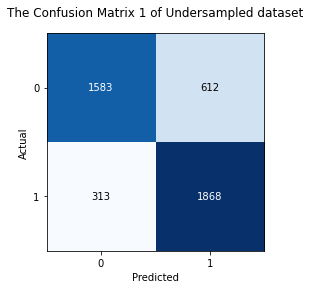

The accuracy is 78.86197440585009 %
The recall from the confusion matrix is 85.64878496102705 %


In [39]:
def confusion_matrix_1(CM):
    fig, ax = plot_confusion_matrix(conf_mat=CM)
    plt.title("The Confusion Matrix 1 of Undersampled dataset")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

    print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
    print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) +" %")
confusion_matrix_1(cm1)


Appliquer la validation croisée pour déterminer l'exactitude de notre modèle

In [40]:

accuracies = cross_val_score(estimator = classifier, X=X_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)
print("The accuracy of our model in % is betweeen {} and {}".format(mean_accuracy-std_accuracy, mean_accuracy+std_accuracy))



The mean accuracy in %:  78.58770990842048
The standard deviation in %  1.0303201548475902
The accuracy of our model in % is betweeen 77.55738975357289 and 79.61803006326807


Applying GridSearch to find if our model is the best fit and also to determine the best parameters to train our model.

In [41]:
#applicons le gridsearchCV sur la classifieur
#Préçisons les paramètres dans un dictionnaire pour tester les différents paramètres.
#Le Gs test tout les paramètres et retourne les paramètres optimaux.

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train.ravel())
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

The best accuracy using gridSearch is 0.9877361469730463
The best parameters for using this model is {'C': 10, 'kernel': 'linear'}


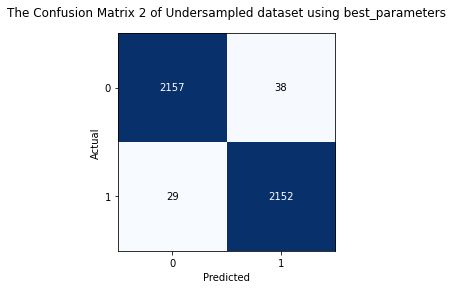

The accuracy is 98.46892138939671 %
The recall from the confusion matrix is 98.67033470884915 %


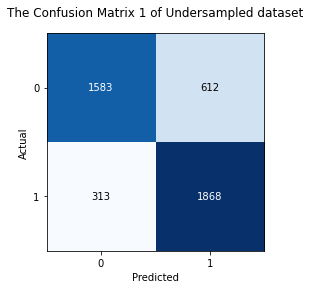

The accuracy is 78.86197440585009 %
The recall from the confusion matrix is 85.64878496102705 %


In [42]:
#fitting the model with the best parameters
classifier_with_best_parameters =  SVC(C= best_parameters["C"], kernel= best_parameters["kernel"], random_state= 0)
classifier_with_best_parameters.fit(X_train, y_train.ravel())
#predicting the Class 
y_pred_best_parameters = classifier_with_best_parameters.predict(X_test)
#creating a confusion matrix
#cm2 is the confusion matrix  which uses the best parameters
cm2 = confusion_matrix(y_test, y_pred_best_parameters)
#visualizing the confusion matrix
def confusion_matrix_2(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM)
    plt.title("The Confusion Matrix 2 of Undersampled dataset using best_parameters")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
    print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) + " %")
confusion_matrix_2(cm2)
#also printing the confusion matrix 1 for comparison
confusion_matrix_1(cm1)